In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from matplotlib import pyplot as plt

#import functions

from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils

In [63]:
df = pd.read_csv('SMBH_Data_0911.csv',header=1)

In [64]:
['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','M_BH'];

In [65]:
keys=['ETG','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN','M_BH', 'log_B/T', 'log_sigma0', 'log_R_e_sph_eq_kpc',
'M*_sph', 'LogSigma0','logRho_soi_approx_new','bvtc','logSigma0sph','log10(R10_kpc)','log10(R90_kpc)']

In [66]:
df_clean=df[keys]
df_clean=df_clean.dropna()

In [7]:
df_clean

,ETG,Bar,Disk,Ring,Core,Multiple,Compactness,AGN,M_BH,log_B/T,log_sigma0,log_R_e_sph_eq_kpc,M*_sph,LogSigma0,logRho_soi_approx_new,bvtc,logSigma0sph,log10(R10_kpc),log10(R90_kpc)
0,1,0,0.0,0,1.0,0,0,0.0,9.59,0.00,2.490000,1.034192,11.70,3.757827,1.417885,0.922,3.900942,0.218957,1.725414
1,1,0,0.0,0,1.0,0,0,1.0,9.38,0.00,2.471453,0.885259,11.69,4.704516,2.426156,0.947,8.218084,-0.222141,1.888005
3,1,0,0.0,0,0.0,0,0,1.0,9.10,-0.02,2.515012,0.960195,11.72,4.033710,2.371550,0.912,5.486389,0.054804,1.631244
5,1,1,1.0,0,0.0,0,0,0.0,8.34,-0.33,2.428669,-0.075639,10.43,3.790449,3.552668,0.853,6.294257,-0.919260,0.645548
6,1,0,1.0,0,0.0,0,0,0.0,5.74,-1.16,1.538951,-1.239789,8.03,4.008665,2.866880,0.883,4.025433,-1.722699,-0.894568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,0,1.0,1,0.0,0,0,1.0,6.83,-0.48,2.030762,-0.635261,10.03,4.836918,3.185089,0.718,4.922064,-1.190203,-0.315629
134,0,0,1.0,0,0.0,0,0,1.0,6.18,-0.86,1.987443,-0.379292,9.88,4.798361,2.014039,0.742,4.021619,-0.950862,-0.175781
136,0,0,1.0,0,0.0,0,0,0.0,8.94,-0.32,2.004106,0.271146,10.49,4.714823,0.484590,0.659,4.140150,-0.343927,0.757146
142,0,1,1.0,0,0.0,0,0,1.0,7.72,-0.62,2.073315,-0.316683,10.28,4.731652,3.165358,0.662,5.408371,-1.033747,0.187162


In [8]:
df_ETG=df_clean[df_clean['ETG']==1]
df_LTG=df_clean[df_clean['ETG']==0]

In [30]:
test_keys=['M_BH', 'log_B/T', 'log_sigma0', 'log_R_e_sph_eq_kpc','M*_sph', 'LogSigma0','logRho_soi_approx_new']
test_keys=['bvtc', 'M_BH', 'log_B/T', 'log_sigma0', 'log_R_e_sph_eq_kpc','M*_sph', 'logSigma0sph']
test_keys=['M_BH', 'log_sigma0','logRho_soi_approx_new','M*_sph']
test_keys=['M_BH', 'log_sigma0','logRho_soi_approx_new','M*_sph','log_R_e_sph_eq_kpc']
#test_keys=['M_BH', 'log_sigma0','M*_sph','log_R_e_sph_eq_kpc']
test_keys=['M_BH', 'log_sigma0','logRho_soi_approx_new','M*_sph','log_R_e_sph_eq_kpc','log10(R10_kpc)','log10(R90_kpc)','log_B/T']
test_keys=['log_sigma0','logRho_soi_approx_new','log_R_e_sph_eq_kpc','log10(R10_kpc)','log10(R90_kpc)','log_B/T']

  0%|          | 0/6 [00:00<?, ?it/s]

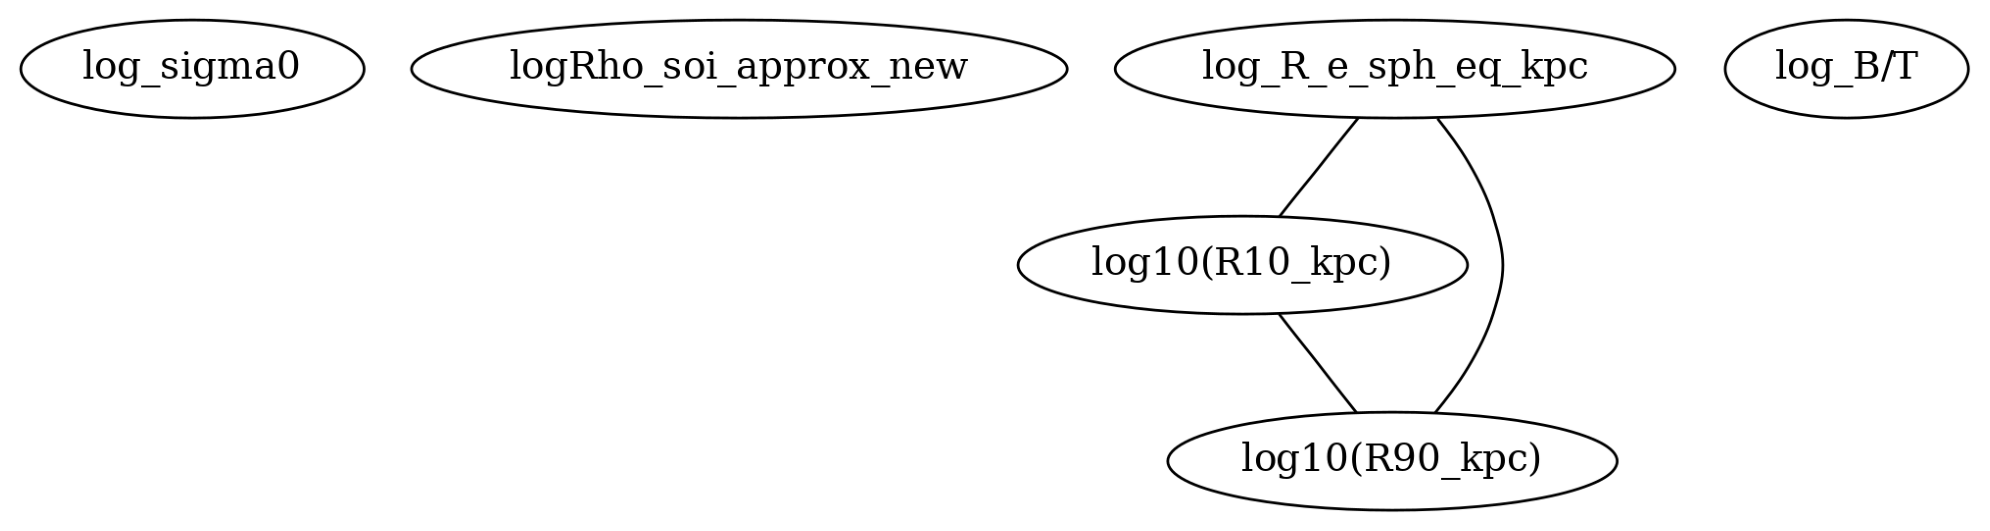

In [31]:
# Ellipticals
df_test=df_ETG[test_keys]
cg = pc(np.array(df_test),indep_test='kci',alpha = 0.05)
# visualization using pydot
cg.draw_pydot_graph(labels=test_keys)

  0%|          | 0/6 [00:00<?, ?it/s]

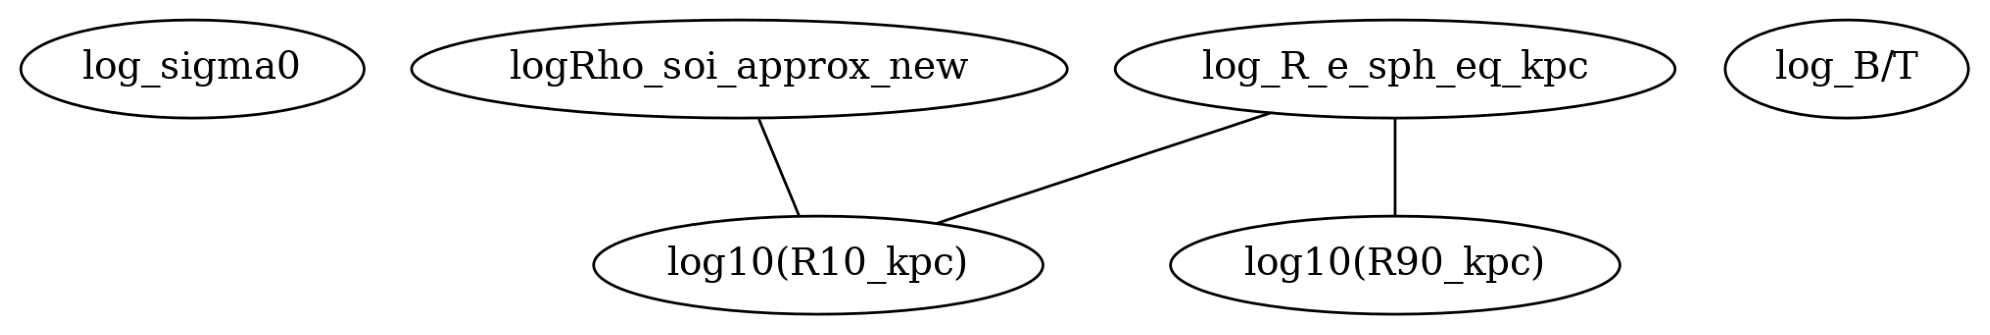

In [32]:
# Spirals
df_test=df_LTG[test_keys]
cg = pc(np.array(df_test),indep_test='kci',alpha = 0.1)
# visualization using pydot
cg.draw_pydot_graph(labels=test_keys)

In [33]:
# calculate the correlation between log_sigma0 and M*_sph in LTG and ETG
df_test=df_LTG[test_keys]
df_test.corr()


,log_sigma0,logRho_soi_approx_new,log_R_e_sph_eq_kpc,log10(R10_kpc),log10(R90_kpc),log_B/T
log_sigma0,1.000000,0.030772,0.320100,0.350619,0.459160,0.073846
logRho_soi_approx_new,0.030772,1.000000,-0.538727,-0.640253,-0.068092,-0.235975
log_R_e_sph_eq_kpc,0.320100,-0.538727,1.000000,0.793691,0.576910,0.476317
log10(R10_kpc),0.350619,-0.640253,0.793691,1.000000,0.736318,0.422537
log10(R90_kpc),0.459160,-0.068092,0.576910,0.736318,1.000000,0.292509
log_B/T,0.073846,-0.235975,0.476317,0.422537,0.292509,1.000000


In [34]:
df_test=df_ETG[test_keys]
df_test.corr()

,log_sigma0,logRho_soi_approx_new,log_R_e_sph_eq_kpc,log10(R10_kpc),log10(R90_kpc),log_B/T
log_sigma0,1.000000,-0.455839,0.717693,0.698366,0.690569,0.717193
logRho_soi_approx_new,-0.455839,1.000000,-0.504362,-0.577854,-0.427123,-0.399594
log_R_e_sph_eq_kpc,0.717693,-0.504362,1.000000,0.978505,0.985653,0.809240
log10(R10_kpc),0.698366,-0.577854,0.978505,1.000000,0.938413,0.744451
log10(R90_kpc),0.690569,-0.427123,0.985653,0.938413,1.000000,0.825311
log_B/T,0.717193,-0.399594,0.809240,0.744451,0.825311,1.000000


  0%|          | 0/6 [00:00<?, ?it/s]

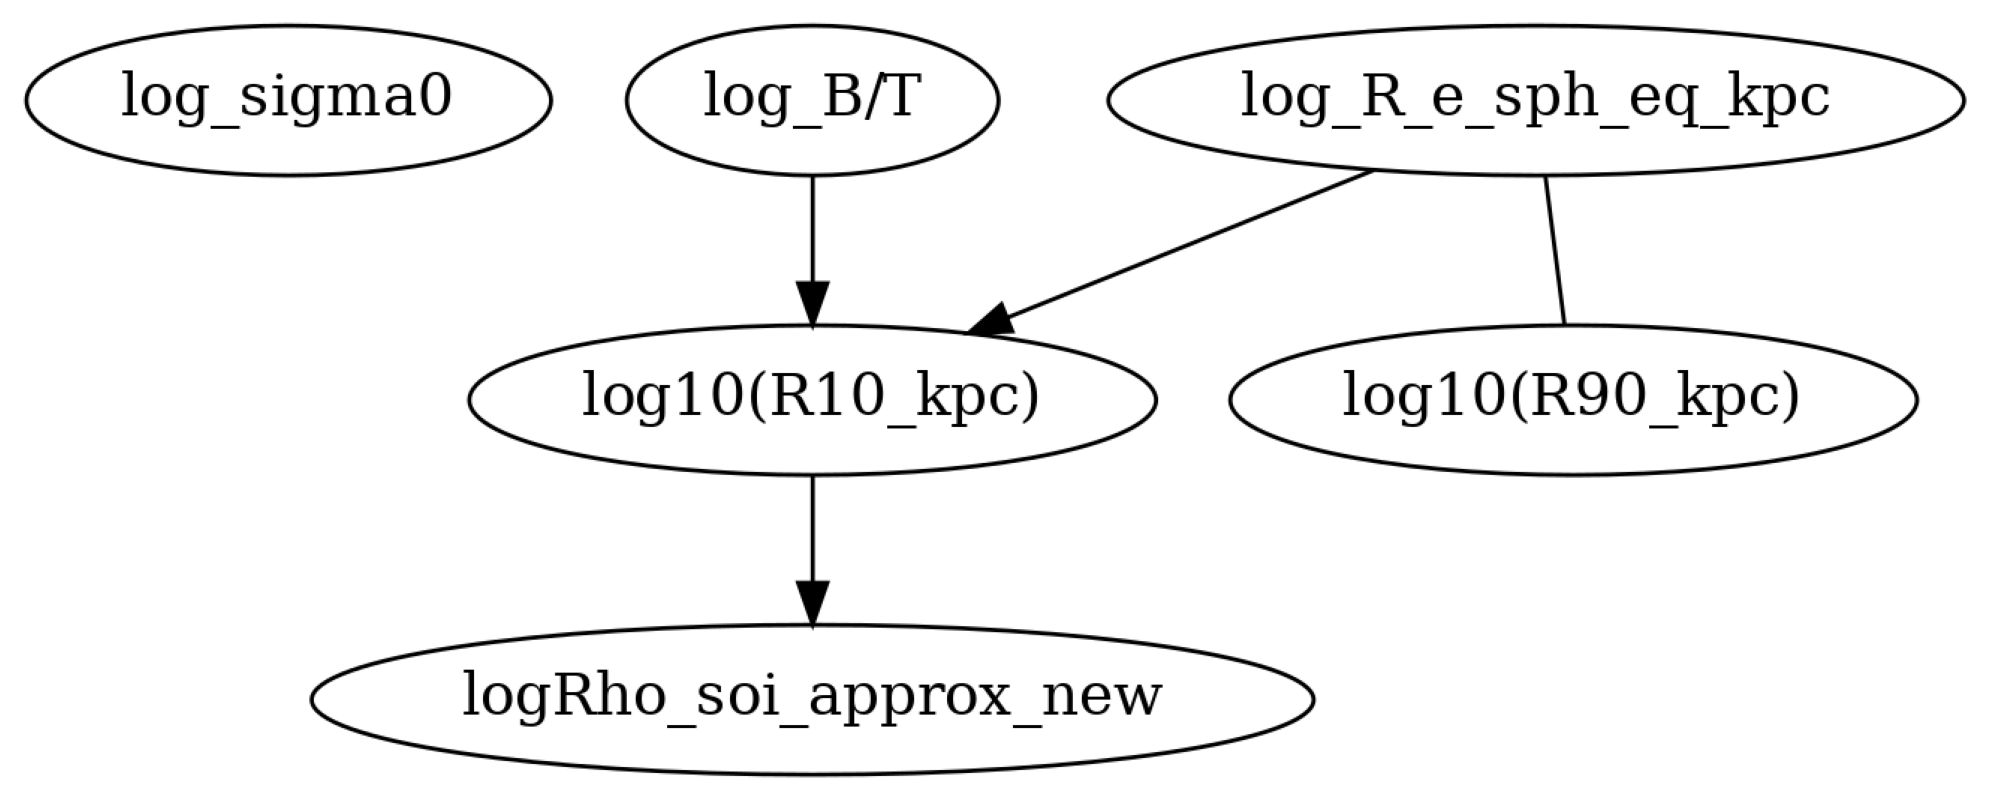

In [36]:
# total
df_test=df_clean[test_keys]
cg = pc(np.array(df_test),indep_test='kci',alpha = 0.1)
# visualization using pydot
cg.draw_pydot_graph(labels=test_keys)

In [33]:
from causallearn.search.FCMBased.PNL.PNL import PNL

data_x = np.array(df_clean['log_sigma0']).reshape(-1, 1)
data_y = np.array(df_clean['M_BH']).reshape(-1, 1)

pnl = PNL()
p_value_foward, p_value_backward = pnl.cause_or_effect(data_x, data_y)

p_value_foward, p_value_backward

(array([0.], dtype=float32), array([0.], dtype=float32))

In [37]:
from causallearn.search.FCMBased.ANM.ANM import ANM

data_x = np.array(df_clean['log_sigma0']).reshape(-1, 1)
data_y = np.array(df_clean['M_BH']).reshape(-1, 1)

anm = ANM()
p_value_foward, p_value_backward = anm.cause_or_effect(data_x, data_y)

p_value_foward, p_value_backward

(0.32925703222896363, 0.0264579687074622)

In [40]:
data_x = np.array(df_ETG['log_sigma0']).reshape(-1, 1)
data_y = np.array(df_ETG['M_BH']).reshape(-1, 1)

anm = ANM()
p_value_foward, p_value_backward = anm.cause_or_effect(data_x, data_y)

p_value_foward, p_value_backward

(0.4396592456070758, 0.0009398302897508648)

In [57]:
test_keys=['M_BH', 'log_sigma0','logRho_soi_approx_new','M*_sph','log_R_e_sph_eq_kpc']
df_test=df_clean[test_keys]

from causallearn.search.FCMBased import lingam
model = lingam.ICALiNGAM(random_state=None, max_iter=1000)
model.fit(np.array(df_test))

print(model.causal_order_)
print(model.adjacency_matrix_)

[1, 4, 3, 0, 2]
[[ 0.          2.41818283  0.          0.58928134  0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-0.8420089   2.06018231  0.          0.          0.        ]
 [ 0.          1.38968186  0.          0.          0.80704016]
 [ 0.          2.52697757  0.          0.          0.        ]]


/home/zj448/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [61]:
p_values = model.get_error_independence_p_values(np.array(df_test))
# print p-values in 3 decimal places
print(np.round(p_values, 3))

[[0.    0.026 0.    0.21  0.204]
 [0.026 0.    0.104 0.293 0.005]
 [0.    0.104 0.    0.497 0.295]
 [0.21  0.293 0.497 0.    0.033]
 [0.204 0.005 0.295 0.033 0.   ]]


In [30]:
df=pd.read_csv('SMBH_Data_01_22_24.csv',header=1)
low_scatter_para=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','M_BH']
df_low_scatter=df[low_scatter_para]
df_low_scatter=df_low_scatter.dropna()

In [25]:
df_low_scatter

,ETG,T-type,Bar,Disk,Ring,Core,Multiple,Compactness,AGN,Pseudobulge,...,logSigma0sph,LogSigma0,R10,logR10,logR10phi,Rh,logRh,logRhphi,logHalo,M_BH
1,1,-4.8,0,0.0,0,1.0,0,0,1.0,0,...,8.218084,4.704516,34.766963,1.541167,10.148833,8.079469,0.907383,10.782617,13.959319,9.380211
3,1,-4.9,0,0.0,0,0.0,0,0,1.0,0,...,5.486389,4.033710,18.612540,1.269806,10.470194,7.044676,0.847861,10.892139,14.060462,9.102971
5,1,-1.9,1,1.0,0,0.0,0,0,0.0,0,...,6.294257,3.790449,9.360143,0.971282,9.791918,1.618051,0.208992,10.554208,12.563130,8.342423
6,1,-2.8,0,1.0,0,0.0,0,0,0.0,0,...,4.025433,4.008665,0.697465,-0.156477,9.346477,0.365014,-0.437691,9.627691,11.525458,5.740000
7,1,-1.2,0,1.0,0,1.0,0,0,0.0,0,...,3.648904,4.059098,11.966130,1.077954,10.302046,2.962211,0.471616,10.908384,13.405242,8.677184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0,2.9,1,1.0,0,0.0,0,0,0.0,1,...,8.242104,4.714507,18.008377,1.255475,10.014525,2.434609,0.386429,10.883571,13.233744,8.279168
133,0,2.3,0,1.0,1,0.0,0,0,1.0,1,...,4.922064,4.836918,8.813445,0.945146,9.564854,0.942243,-0.025837,10.535837,12.289895,6.833669
134,0,2.2,0,1.0,0,0.0,0,0,1.0,1,...,4.021619,4.798361,10.510415,1.021620,9.718380,1.828245,0.262034,10.477966,12.536387,6.198130
136,0,4.0,0,1.0,0,0.0,0,0,0.0,1,...,4.140150,4.714823,16.634078,1.220999,9.589001,3.155569,0.499078,10.310922,12.618079,8.935845


In [13]:
from causallearn.search.ConstraintBased.FCI import fci

# default parameters
g, edges = fci(np.array(df_low_scatter))

# visualization
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''